## Machine Learning Project: Apartment Rent Price in NYC

This study is based on Terrence Parr and Jeremy Howard's ebook: <a href="https://mlbook.explained.ai/">The Mechanics of Machine Learning</a>

To get the dataset file, please refer to this <a href="https://mlbook.explained.ai/first-taste.html">A First Taste of Applied Machine Learning</a>, section 3.2.1 Loading and sniffing the training data
    

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# importing dataset
df = pd.read_csv('data/rent.csv')
df.head().T

,0,1,2,3,4
bathrooms,1,1,1,1.5,1
bedrooms,1,2,2,3,0
building_id,8579a0b0d54db803821a35a4a615e97a,b8e75fc949a6cd8225b455648a951712,cd759a988b8f23924b5a2058d5ab2b49,53a5b119ba8f7b61d4e010512e0dfc85,bfb9405149bfff42a92980b594c28234
created,2016-06-16 05:55:27,2016-06-01 05:44:33,2016-06-14 15:19:59,2016-06-24 07:54:24,2016-06-28 03:50:23
description,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Over-sized Studio w abundant closets. Availabl...
display_address,145 Borinquen Place,East 44th,East 56th Street,Metropolitan Avenue,East 34th Street
features,"['Dining Room', 'Pre-War', 'Laundry in Buildin...","['Doorman', 'Elevator', 'Laundry in Building',...","['Doorman', 'Elevator', 'Laundry in Building',...",[],"['Doorman', 'Elevator', 'Fitness Center', 'Lau..."
latitude,40.7108,40.7513,40.7575,40.7145,40.7439
listing_id,7170325,7092344,7158677,7211212,7225292
longitude,-73.9539,-73.9722,-73.9625,-73.9425,-73.9743


In [5]:
# to inspect the data, column names, no.of entries, type and to check if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        47906 non-null object
display_address    49217 non-null object
features           49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49342 non-null object
interest_level     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 5.6+ MB


In [6]:
# get subset of the dataframe
df_num = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]
df_num.head(2)

,bathrooms,bedrooms,longitude,latitude,price
0,1.0,1,-73.9539,40.7108,2400
1,1.0,2,-73.9722,40.7513,3800


In [7]:
# check if there are missing values
print(df_num.isnull().any())

bathrooms    False
bedrooms     False
longitude    False
latitude     False
price        False
dtype: bool


### Training and Evaluating Initial Model

In [9]:
# separate fetures and target column
X_train = df_num.drop('price', axis=1)
y_train = df_num['price']

In [10]:
# train the model with appropriate parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [11]:
# evaluate the model using R2-score
r2 = rf.score(X_train, y_train)
print( f"{r2:.4f}" )

0.8427


In [12]:
# check the model generality using out-of-the-bag score
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score 0.0246


In [13]:
# verify the the mean absolute error (MAE) will produce same result
# this time the data will be split into training and test data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = df_num.drop('price', axis=1), df_num['price']

errors = []
print(f"Validation MAE trials:", end='')
for i in range(7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

Validation MAE trials: $432 $835 $455 $868 $729 $925 $442
Average validation MAE $669


### Exploring and Denoising the Dataset

In [14]:
# inspect the distribution
df_num.describe()

,bathrooms,bedrooms,longitude,latitude,price
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04
mean,1.21218,1.541640,-73.955716,40.741545,3.830174e+03
std,0.50142,1.115018,1.177912,0.638535,2.206687e+04
min,0.00000,0.000000,-118.271000,0.000000,4.300000e+01
25%,1.00000,1.000000,-73.991700,40.728300,2.500000e+03
50%,1.00000,1.000000,-73.977900,40.751800,3.150000e+03
75%,1.00000,2.000000,-73.954800,40.774300,4.100000e+03
max,10.00000,8.000000,0.000000,44.883500,4.490000e+06


In [15]:
# examining the data distributions
print(df_num.price.sort_values(ascending=False).head(10))

12947    4490000
4793     1150000
22968    1070000
22058    1070000
49289     135000
1830      111111
36476     100000
21525      90000
46382      85000
38564      80000
Name: price, dtype: int64


In [16]:
# get the counts of the unique value
print(df_num.bathrooms.value_counts())

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64


In [17]:
print(df_num.bedrooms.value_counts())

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64


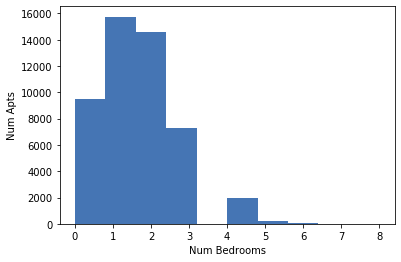

In [19]:
# inspect the data visually using histogram
bookcolors = { # our usual book color palette 
         'crimson': '#a50026', 'red': '#d73027','redorange': '#f46d43', 'orange': '#fdae61','yellow': '#fee090', 
         'sky': '#e0f3f8','babyblue': '#abd9e9', 'lightblue': '#74add1', 'blue': '#4575b4', 'purple': '#313695'}
fig,ax = plt.subplots()
ax.set_xlabel('Num Bedrooms')
ax.set_ylabel('Num Apts')
ax.hist(df_num.bedrooms, color=bookcolors['blue'])
plt.show()

In [20]:
# inspect latitude and longitude having 0,0 location - get the numbers
print(len(df[(df.longitude==0.0) & (df.latitude==0.0)]))

12


In [21]:
# detecting the outliers
df_local = df[(df.latitude>40.764) & (df.latitude<40.7678) &
              (df.longitude>=-73.9844) & (df.longitude<=-73.9842) & (df.bathrooms==1) & (df.bedrooms==1)]
df_local[['bedrooms','bathrooms','street_address','price']].sort_values('price')

,bedrooms,bathrooms,street_address,price
31301,1,1.0,west 54 st & 8 ave,2300
14887,1,1.0,300 West 55th Street,2400
9153,1,1.0,300 West 55th Street,3350
38815,1,1.0,300 West 55th Street,3400
22058,1,1.0,333 West 57th Street,1070000
22968,1,1.0,333 West 57th Street,1070000


### Excising the Anomalies

In [22]:
# filter all records (training/testing)
df_clean = df_num[(df_num.price>1_000) & (df_num.price<10_000)]

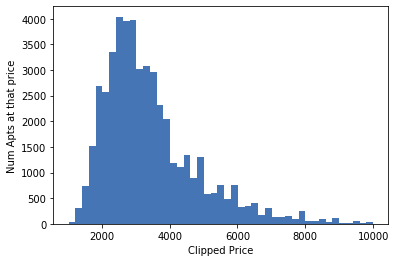

In [23]:
# To visualize the distribution of cleaned-up prices, let's use a histogram again
fig,ax = plt.subplots()
ax.set_xlabel('Clipped Price')
ax.set_ylabel('Num Apts at that price')
ax.hist(df_clean.price, bins=45, color=bookcolors['blue'])
plt.show()

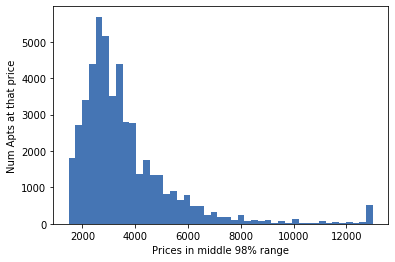

In [24]:
# clipping out the top and bottom 1% to exclude the outliers
upper, lower = np.percentile(df.price, [1,99]) # find middle 98% of prices
clipped = np.clip(df.price, upper, lower)
fig,ax = plt.subplots()
ax.set_xlabel('Prices in middle 98% range')
ax.set_ylabel('Num Apts at that price')
ax.hist(clipped, bins=45, color=bookcolors['blue'])
plt.show()

In [25]:
# get no. of records out of New York City proper
df_missing = df_clean[(df_clean.longitude==0) | (df_clean.latitude==0)]
print(len(df_missing))

11


In [26]:
# delete the records without affecting the training set
df_clean = df_clean[(df_clean.longitude!=0) | (df_clean.latitude!=0)]

In [30]:
# delete the records out of the bounding box of NYC
df_clean = df_clean[(df_clean['latitude']>40.55) &
                    (df_clean['latitude']<40.94) &
                    (df_clean['longitude']>-74.1) &
                    (df_clean['longitude']<-73.67)]

###  Comparing models trained on denoised data

In [31]:
# using the cleaned data
X, y = df_clean.drop('price', axis=1), df_clean['price']
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,        # parallelize
                           oob_score=True)   # get error estimate
rf.fit(X, y)
clean_oob_r2 = rf.oob_score_
print(f"Validation OOB score {clean_oob_r2:.4f}")

Validation OOB score 0.8678


In [32]:
# verify the result of MAE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

errors = []
print(f"Validation MAE trials:", end='')
for i in range(7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

Validation MAE trials: $298 $299 $302 $288 $295 $291 $294
Average validation MAE $295


In [33]:
# try different model to check if we can improve model's accuracy: Use Lasso Regression
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lm = Lasso(alpha=0.5) # create linear model
lm.fit(X_train, y_train)
print(f"LM Training score {lm.score(X_train, y_train):.4f}")
print(f"LM Validation score {lm.score(X_test, y_test):.4f}")

LM Training score 0.5747
LM Validation score 0.5815


In [34]:
# try Gradient Booting
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 2000)
gbr.fit(X_train, y_train)
print(f"GB Training score {gbr.score(X_train, y_train):.4f}")
print(f"GB Validation score {gbr.score(X_test, y_test):.4f}")

GB Training score 0.8389
GB Validation score 0.8195


### Transforming the Distribution

In [36]:
# to transform the skewed distribution to normal distribution by taking the log of the target variables
# this affects the overall accuracy of a model trained on the original, noisy data set
X, y = df_num.drop('price', axis=1), df_num['price']
y_log = np.log(y) # apply log to each price

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X, y_log)
log_oob_r2 = rf.oob_score_
print(f"OOB R^2 score for log(price) {log_oob_r2:.4f}")

OOB R^2 score for log(price) 0.8770


In [39]:
# To make actual predictions for some X_test, take the exp of model predictions to get prices in dollars 
y_predicted_log = rf.predict(X_test)
y_predicted = np.exp(y_predicted_log)
print('Maximum value:', y_predicted.max())
print('Minimum vlaue:', y_predicted.min())
print('Mean value:', y_predicted.mean())

Maximum value: 11662.413402800783
Minimum vlaue: 1011.1087571401379
Mean value: 3438.782536800864
